# Statistical Power

## Introduction


We've started to investigate hypothesis testing, p-values and their use for accepting or rejecting the null hypothesis. Building upon this, we can develop a concept of the power of a statistical test, as the test's ability to detect a difference, when one exists. In the case of our coin flipping example, the power of our statistical test would be the probability of rejecting the null hypothesis "this coin is fair" when the coin was unfair. As you might assume, the power of this statistical test would thus depend on several factors including our p-value threshold for rejecting the null hypothesis, the size of our sample and the 'level of unfairness' of the coin in question.

## Objectives

You will be able to:

* Describe the concept of “Power” in relation to p-value and effect size for hypothesis testing
* Understand and critically evaluate the factors influencing the power of an experiment
* Perform Power calculation using SciPy and Python
* Demonstrate the impact of sample size on statistical power using simulations
* Demonstrate the combined effect of sample size and effect size on statistical power using simulations  

## The Power of a Statistical Test

The power of a statistical test is defined as the probability of rejecting the null hypothesis, given that it is indeed false. As with any probability, the power of a statistical test therefore ranges from 0 to 1, with 1 being a perfect test that gaurantees rejecting the null hypothesis when it is indeed false.

With that, let's recreate our previous coin flip simulation, and use it to plot some relationships between power, sample size, and our p-value cutoff.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')
%matplotlib inline

[0.0,
 0.57,
 0.445,
 0.84,
 0.67,
 0.86,
 0.7,
 0.925,
 0.785,
 0.935,
 0.89,
 0.98,
 0.92,
 0.94,
 0.925,
 0.975,
 0.975,
 0.975,
 0.975,
 0.995,
 0.975,
 0.98,
 0.99,
 1.0,
 0.995,
 0.995,
 0.98,
 1.0,
 1.0,
 0.995,
 0.995,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.995,
 1.0,
 1.0,
 1.0,
 0.995,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

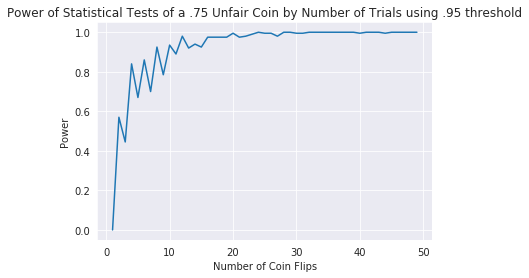

In [45]:
#What does the power increase as we increase sample size?
powers = []
cutoff = .95 #Set the p-value threshold for rejecting the null hypothesis
#Iterate through various sample sizes
unfair_coin_prob = .75
for n in range(1,50):
    #Do multiple runs for that number of samples to compare
    p_val = []
    for i in range(200):
        n_heads = np.random.binomial(n, unfair_coin_prob)
        mu = n / 2
        sigma = np.sqrt(n*.5*(1-.5))
        #print(sigma)
        z = (n_heads - mu) / (sigma / np.sqrt(n))
        p_val.append(st.norm.cdf(np.abs(z)))
        #print(n_heads, mu, z, np.abs(z), st.norm.cdf(np.abs(z)),st.norm.cdf(np.abs(z)) >= cutoff )
    cur_power = sum([1 if p >= cutoff else 0 for p in p_val])/200
    powers.append(cur_power)
plt.plot(list(range(1,50)), powers)
plt.title('Power of Statistical Tests of a .75 Unfair Coin by Number of Trials using .95 threshold')
plt.ylabel('Power')
plt.xlabel('Number of Coin Flips')
powers

As you can see, the statistical power of this test is wonderful once we take a sample of just 20 flips! You can also imagine how this power might change if we require a p-value of .99 to reject the null hypothesis:

1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.84134

4.0 0.9999683287581669
2.0 0.9772498680518208
2.0 0.9772498680518208
4.0 0.9999683287581669
2.0 0.9772498680518208
4.0 0.9999683287581669
2.0 0.9772498680518208
2.0 0.9772498680518208
2.0 0.9772498680518208
4.0 0.9999683287581669
2.0 0.9772498680518208
2.0 0.9772498680518208
2.0 0.9772498680518208
0.0 0.5
0.0 0.5
2.0 0.9772498680518208
2.0 0.9772498680518208
0.0 0.5
2.0 0.9772498680518208
2.0 0.9772498680518208
4.0 0.9999683287581669
4.0 0.9999683287581669
2.0 0.9772498680518208
0.0 0.5
0.0 0.5
2.0 0.9772498680518208
0.0 0.5
4.0 0.9999683287581669
0.0 0.5
4.0 0.9999683287581669
4.0 0.9999683287581669
0.0 0.5
0.0 0.5
2.0 0.9772498680518208
4.0 0.9999683287581669
4.0 0.9999683287581669
4.0 0.9999683287581669
2.0 0.9772498680518208
4.0 0.9999683287581669
2.0 0.9772498680518208
4.0 0.9999683287581669
0.0 0.5
2.0 0.9772498680518208
2.0 0.9772498680518208
4.0 0.9999683287581669
0.0 0.5
4.0 0.9999683287581669
0.0 0.5
4.0 0.9999683287581669
0.0 0.5
4.0 0.9999683287581669
2.0 0.9772498680518208

1.0 0.8413447460685429
7.0 0.9999999999987201
5.0 0.9999997133484281
3.0 0.9986501019683699
3.0 0.9986501019683699
1.0 0.8413447460685429
1.0 0.8413447460685429
5.0 0.9999997133484281
7.0 0.9999999999987201
3.0 0.9986501019683699
1.0 0.8413447460685429
3.0 0.9986501019683699
3.0 0.9986501019683699
5.0 0.9999997133484281
3.0 0.9986501019683699
3.0 0.9986501019683699
3.0 0.9986501019683699
1.0 0.8413447460685429
7.0 0.9999999999987201
5.0 0.9999997133484281
7.0 0.9999999999987201
1.0 0.8413447460685429
7.0 0.9999999999987201
3.0 0.9986501019683699
3.0 0.9986501019683699
7.0 0.9999999999987201
1.0 0.8413447460685429
5.0 0.9999997133484281
3.0 0.9986501019683699
3.0 0.9986501019683699
5.0 0.9999997133484281
5.0 0.9999997133484281
1.0 0.8413447460685429
1.0 0.8413447460685429
5.0 0.9999997133484281
5.0 0.9999997133484281
7.0 0.9999999999987201
3.0 0.9986501019683699
5.0 0.9999997133484281
7.0 0.9999999999987201
7.0 0.9999999999987201
1.0 0.8413447460685429
5.0 0.9999997133484281
7.0 0.99999

3.0 0.9986501019683699
11.0 1.0
7.0 0.9999999999987201
7.0 0.9999999999987201
5.0 0.9999997133484281
7.0 0.9999999999987201
7.0 0.9999999999987201
5.0 0.9999997133484281
5.0 0.9999997133484281
9.0 1.0
3.0 0.9986501019683699
7.0 0.9999999999987201
9.0 1.0
7.0 0.9999999999987201
7.0 0.9999999999987201
5.0 0.9999997133484281
9.0 1.0
5.0 0.9999997133484281
1.0 0.8413447460685429
9.0 1.0
1.0 0.8413447460685429
1.0 0.8413447460685429
7.0 0.9999999999987201
3.0 0.9986501019683699
5.0 0.9999997133484281
7.0 0.9999999999987201
9.0 1.0
7.0 0.9999999999987201
3.0 0.9986501019683699
7.0 0.9999999999987201
11.0 1.0
9.0 1.0
9.0 1.0
9.0 1.0
5.0 0.9999997133484281
11.0 1.0
5.0 0.9999997133484281
7.0 0.9999999999987201
7.0 0.9999999999987201
5.0 0.9999997133484281
1.0 0.8413447460685429
9.0 1.0
5.0 0.9999997133484281
5.0 0.9999997133484281
1.0 0.8413447460685429
7.0 0.9999999999987201
3.0 0.9986501019683699
7.0 0.9999999999987201
9.0 1.0
7.0 0.9999999999987201
11.0 1.0
7.0 0.9999999999987201
3.0 0.9986

8.0 0.9999999999999993
10.0 1.0
4.0 0.9999683287581669
2.0 0.9772498680518208
0.0 0.5
8.0 0.9999999999999993
8.0 0.9999999999999993
10.0 1.0
8.0 0.9999999999999993
10.0 1.0
6.0 0.9999999990134123
2.0 0.9772498680518208
12.0 1.0
6.0 0.9999999990134123
4.0 0.9999683287581669
0.0 0.5
10.0 1.0
10.0 1.0
8.0 0.9999999999999993
10.0 1.0
4.0 0.9999683287581669
8.0 0.9999999999999993
2.0 0.9772498680518208
0.0 0.5
8.0 0.9999999999999993
6.0 0.9999999990134123
6.0 0.9999999990134123
14.0 1.0
2.0 0.9772498680518208
6.0 0.9999999990134123
6.0 0.9999999990134123
8.0 0.9999999999999993
8.0 0.9999999999999993
10.0 1.0
12.0 1.0
8.0 0.9999999999999993
4.0 0.9999683287581669
8.0 0.9999999999999993
0.0 0.5
0.0 0.5
6.0 0.9999999990134123
6.0 0.9999999990134123
6.0 0.9999999990134123
8.0 0.9999999999999993
6.0 0.9999999990134123
12.0 1.0
2.0 0.9772498680518208
4.0 0.9999683287581669
6.0 0.9999999990134123
2.0 0.9772498680518208
6.0 0.9999999990134123
8.0 0.9999999999999993
6.0 0.9999999990134123
8.0 0.9999

9.0 1.0
7.0 0.9999999999987201
3.0 0.9986501019683699
9.0 1.0
9.0 1.0
11.0 1.0
9.0 1.0
3.0 0.9986501019683699
9.0 1.0
5.0 0.9999997133484281
9.0 1.0
11.0 1.0
13.0 1.0
5.0 0.9999997133484281
13.0 1.0
11.0 1.0
7.0 0.9999999999987201
9.0 1.0
13.0 1.0
11.0 1.0
11.0 1.0
11.0 1.0
9.0 1.0
7.0 0.9999999999987201
15.0 1.0
9.0 1.0
9.0 1.0
3.0 0.9986501019683699
3.0 0.9986501019683699
11.0 1.0
15.0 1.0
13.0 1.0
15.0 1.0
9.0 1.0
7.0 0.9999999999987201
7.0 0.9999999999987201
11.0 1.0
9.0 1.0
1.0 0.8413447460685429
3.0 0.9986501019683699
7.0 0.9999999999987201
11.0 1.0
5.0 0.9999997133484281
17.0 1.0
9.0 1.0
1.0 0.8413447460685429
9.0 1.0
9.0 1.0
13.0 1.0
13.0 1.0
7.0 0.9999999999987201
13.0 1.0
2.0 0.9772498680518208
6.0 0.9999999990134123
8.0 0.9999999999999993
8.0 0.9999999999999993
14.0 1.0
10.0 1.0
2.0 0.9772498680518208
10.0 1.0
8.0 0.9999999999999993
14.0 1.0
8.0 0.9999999999999993
2.0 0.9772498680518208
14.0 1.0
2.0 0.9772498680518208
8.0 0.9999999999999993
6.0 0.9999999990134123
8.0 0.99999

9.0 1.0
7.0 0.9999999999987201
3.0 0.9986501019683699
9.0 1.0
5.0 0.9999997133484281
7.0 0.9999999999987201
15.0 1.0
5.0 0.9999997133484281
15.0 1.0
3.0 0.9986501019683699
13.0 1.0
11.0 1.0
7.0 0.9999999999987201
13.0 1.0
13.0 1.0
17.0 1.0
11.0 1.0
7.0 0.9999999999987201
7.0 0.9999999999987201
7.0 0.9999999999987201
13.0 1.0
9.0 1.0
15.0 1.0
9.0 1.0
11.0 1.0
13.0 1.0
11.0 1.0
3.0 0.9986501019683699
15.0 1.0
17.0 1.0
7.0 0.9999999999987201
7.0 0.9999999999987201
11.0 1.0
13.0 1.0
11.0 1.0
7.0 0.9999999999987201
9.0 1.0
11.0 1.0
19.0 1.0
7.0 0.9999999999987201
15.0 1.0
13.0 1.0
11.0 1.0
11.0 1.0
11.0 1.0
11.0 1.0
7.0 0.9999999999987201
7.0 0.9999999999987201
7.0 0.9999999999987201
9.0 1.0
17.0 1.0
15.0 1.0
15.0 1.0
13.0 1.0
7.0 0.9999999999987201
9.0 1.0
9.0 1.0
5.0 0.9999997133484281
7.0 0.9999999999987201
11.0 1.0
9.0 1.0
9.0 1.0
9.0 1.0
7.0 0.9999999999987201
9.0 1.0
11.0 1.0
11.0 1.0
7.0 0.9999999999987201
13.0 1.0
3.0 0.9986501019683699
13.0 1.0
7.0 0.9999999999987201
5.0 0.99999971

12.0 1.0
16.0 1.0
8.0 0.9999999999999993
12.0 1.0
16.0 1.0
12.0 1.0
4.0 0.9999683287581669
14.0 1.0
16.0 1.0
10.0 1.0
6.0 0.9999999990134123
20.0 1.0
12.0 1.0
16.0 1.0
14.0 1.0
8.0 0.9999999999999993
24.0 1.0
16.0 1.0
14.0 1.0
16.0 1.0
14.0 1.0
14.0 1.0
8.0 0.9999999999999993
10.0 1.0
10.0 1.0
16.0 1.0
16.0 1.0
8.0 0.9999999999999993
10.0 1.0
20.0 1.0
20.0 1.0
6.0 0.9999999990134123
12.0 1.0
10.0 1.0
14.0 1.0
16.0 1.0
6.0 0.9999999990134123
18.0 1.0
18.0 1.0
10.0 1.0
12.0 1.0
16.0 1.0
14.0 1.0
12.0 1.0
16.0 1.0
18.0 1.0
12.0 1.0
6.0 0.9999999990134123
0.0 0.5
6.0 0.9999999990134123
12.0 1.0
8.0 0.9999999999999993
6.0 0.9999999990134123
12.0 1.0
9.0 1.0
19.0 1.0
13.0 1.0
5.0 0.9999997133484281
11.0 1.0
19.0 1.0
13.0 1.0
5.0 0.9999997133484281
13.0 1.0
15.0 1.0
11.0 1.0
11.0 1.0
17.0 1.0
5.0 0.9999997133484281
5.0 0.9999997133484281
21.0 1.0
7.0 0.9999999999987201
1.0 0.8413447460685429
15.0 1.0
7.0 0.9999999999987201
15.0 1.0
9.0 1.0
13.0 1.0
17.0 1.0
9.0 1.0
3.0 0.9986501019683699
7.0 

9.0 1.0
11.0 1.0
9.0 1.0
15.0 1.0
13.0 1.0
11.0 1.0
17.0 1.0
9.0 1.0
9.0 1.0
11.0 1.0
21.0 1.0
21.0 1.0
13.0 1.0
13.0 1.0
15.0 1.0
21.0 1.0
11.0 1.0
9.0 1.0
13.0 1.0
15.0 1.0
19.0 1.0
13.0 1.0
17.0 1.0
15.0 1.0
25.0 1.0
15.0 1.0
11.0 1.0
7.0 0.9999999999987201
3.0 0.9986501019683699
5.0 0.9999997133484281
15.0 1.0
15.0 1.0
13.0 1.0
19.0 1.0
15.0 1.0
17.0 1.0
17.0 1.0
11.0 1.0
11.0 1.0
17.0 1.0
19.0 1.0
17.0 1.0
17.0 1.0
11.0 1.0
17.0 1.0
15.0 1.0
15.0 1.0
11.0 1.0
9.0 1.0
15.0 1.0
13.0 1.0
25.0 1.0
11.0 1.0
9.0 1.0
15.0 1.0
5.0 0.9999997133484281
11.0 1.0
19.0 1.0
19.0 1.0
7.0 0.9999999999987201
9.0 1.0
13.0 1.0
21.0 1.0
17.0 1.0
21.0 1.0
9.0 1.0
9.0 1.0
19.0 1.0
17.0 1.0
7.0 0.9999999999987201
11.0 1.0
6.0 0.9999999990134123
20.0 1.0
16.0 1.0
10.0 1.0
16.0 1.0
20.0 1.0
12.0 1.0
18.0 1.0
22.0 1.0
18.0 1.0
12.0 1.0
24.0 1.0
12.0 1.0
16.0 1.0
22.0 1.0
16.0 1.0
16.0 1.0
8.0 0.9999999999999993
14.0 1.0
20.0 1.0
24.0 1.0
12.0 1.0
12.0 1.0
16.0 1.0
14.0 1.0
14.0 1.0
14.0 1.0
12.0 1.0
20.0 1.

20.0 1.0
16.0 1.0
24.0 1.0
22.0 1.0
18.0 1.0
12.0 1.0
8.0 0.9999999999999993
22.0 1.0
12.0 1.0
24.0 1.0
10.0 1.0
12.0 1.0
16.0 1.0
22.0 1.0
16.0 1.0
18.0 1.0
16.0 1.0
22.0 1.0
18.0 1.0
14.0 1.0
12.0 1.0
18.0 1.0
14.0 1.0
16.0 1.0
22.0 1.0
20.0 1.0
20.0 1.0
20.0 1.0
18.0 1.0
20.0 1.0
22.0 1.0
24.0 1.0
14.0 1.0
26.0 1.0
16.0 1.0
18.0 1.0
6.0 0.9999999990134123
26.0 1.0
16.0 1.0
16.0 1.0
28.0 1.0
8.0 0.9999999999999993
16.0 1.0
14.0 1.0
14.0 1.0
12.0 1.0
22.0 1.0
10.0 1.0
14.0 1.0
22.0 1.0
18.0 1.0
22.0 1.0
16.0 1.0
10.0 1.0
16.0 1.0
8.0 0.9999999999999993
20.0 1.0
14.0 1.0
16.0 1.0
14.0 1.0
24.0 1.0
12.0 1.0
18.0 1.0
12.0 1.0
14.0 1.0
16.0 1.0
16.0 1.0
24.0 1.0
14.0 1.0
18.0 1.0
18.0 1.0
22.0 1.0
20.0 1.0
16.0 1.0
16.0 1.0
22.0 1.0
16.0 1.0
18.0 1.0
18.0 1.0
16.0 1.0
26.0 1.0
12.0 1.0
22.0 1.0
14.0 1.0
22.0 1.0
20.0 1.0
12.0 1.0
18.0 1.0
18.0 1.0
20.0 1.0
17.0 1.0
21.0 1.0
17.0 1.0
19.0 1.0
21.0 1.0
21.0 1.0
15.0 1.0
19.0 1.0
21.0 1.0
23.0 1.0
17.0 1.0
17.0 1.0
17.0 1.0
15.0 1.0
9.0 1.0


21.0 1.0
21.0 1.0
19.0 1.0
29.0 1.0
19.0 1.0
17.0 1.0
19.0 1.0
13.0 1.0
21.0 1.0
23.0 1.0
17.0 1.0
19.0 1.0
23.0 1.0
17.0 1.0
25.0 1.0
21.0 1.0
27.0 1.0
18.0 1.0
24.0 1.0
20.0 1.0
12.0 1.0
30.0 1.0
24.0 1.0
24.0 1.0
22.0 1.0
22.0 1.0
20.0 1.0
18.0 1.0
10.0 1.0
20.0 1.0
18.0 1.0
20.0 1.0
18.0 1.0
20.0 1.0
22.0 1.0
14.0 1.0
24.0 1.0
20.0 1.0
16.0 1.0
22.0 1.0
8.0 0.9999999999999993
20.0 1.0
24.0 1.0
16.0 1.0
20.0 1.0
16.0 1.0
24.0 1.0
18.0 1.0
28.0 1.0
22.0 1.0
22.0 1.0
20.0 1.0
22.0 1.0
16.0 1.0
14.0 1.0
20.0 1.0
22.0 1.0
26.0 1.0
22.0 1.0
28.0 1.0
22.0 1.0
22.0 1.0
30.0 1.0
12.0 1.0
24.0 1.0
24.0 1.0
16.0 1.0
30.0 1.0
20.0 1.0
22.0 1.0
16.0 1.0
18.0 1.0
28.0 1.0
28.0 1.0
26.0 1.0
16.0 1.0
20.0 1.0
22.0 1.0
18.0 1.0
8.0 0.9999999999999993
26.0 1.0
22.0 1.0
16.0 1.0
22.0 1.0
12.0 1.0
18.0 1.0
8.0 0.9999999999999993
26.0 1.0
16.0 1.0
30.0 1.0
24.0 1.0
16.0 1.0
26.0 1.0
14.0 1.0
18.0 1.0
26.0 1.0
14.0 1.0
26.0 1.0
18.0 1.0
10.0 1.0
12.0 1.0
26.0 1.0
32.0 1.0
24.0 1.0
20.0 1.0
22.0 1.0
18.0

23.0 1.0
35.0 1.0
23.0 1.0
19.0 1.0
15.0 1.0
17.0 1.0
25.0 1.0
23.0 1.0
37.0 1.0
25.0 1.0
29.0 1.0
27.0 1.0
23.0 1.0
13.0 1.0
29.0 1.0
23.0 1.0
23.0 1.0
21.0 1.0
23.0 1.0
33.0 1.0
19.0 1.0
19.0 1.0
19.0 1.0
21.0 1.0
23.0 1.0
29.0 1.0
27.0 1.0
21.0 1.0
25.0 1.0
23.0 1.0
15.0 1.0
23.0 1.0
21.0 1.0
13.0 1.0
23.0 1.0
19.0 1.0
17.0 1.0
21.0 1.0
21.0 1.0
21.0 1.0
5.0 0.9999997133484281
29.0 1.0
23.0 1.0
23.0 1.0
25.0 1.0
23.0 1.0
19.0 1.0
29.0 1.0
19.0 1.0
27.0 1.0
17.0 1.0
33.0 1.0
19.0 1.0
31.0 1.0
19.0 1.0
19.0 1.0
25.0 1.0
31.0 1.0
13.0 1.0
31.0 1.0
29.0 1.0
21.0 1.0
19.0 1.0
25.0 1.0
25.0 1.0
21.0 1.0
25.0 1.0
33.0 1.0
27.0 1.0
15.0 1.0
31.0 1.0
21.0 1.0
15.0 1.0
29.0 1.0
29.0 1.0
17.0 1.0
27.0 1.0
19.0 1.0
19.0 1.0
23.0 1.0
23.0 1.0
17.0 1.0
29.0 1.0
27.0 1.0
27.0 1.0
9.0 1.0
21.0 1.0
29.0 1.0
25.0 1.0
23.0 1.0
13.0 1.0
13.0 1.0
33.0 1.0
25.0 1.0
25.0 1.0
35.0 1.0
13.0 1.0
29.0 1.0
21.0 1.0
23.0 1.0
25.0 1.0
29.0 1.0
31.0 1.0
23.0 1.0
19.0 1.0
25.0 1.0
19.0 1.0
15.0 1.0
23.0 1.0
23.0 1

Text(0.5, 0, 'Number of Coin Flips')

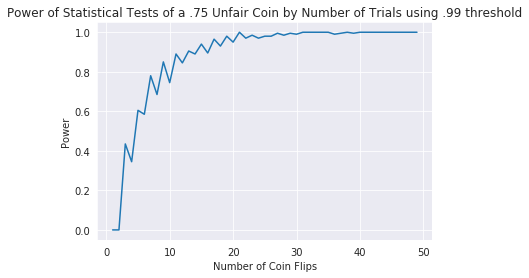

In [36]:
#What does the power increase as we increase sample size?
powers = []
cutoff = .99 #Set the p-value threshold for rejecting the null hypothesis
#Iterate through various sample sizes
unfair_coin_prob = .75
for n in range(1,50):
    #Do multiple runs for that number of samples to compare
    p_val = []
    for i in range(200):
        n_heads = np.random.binomial(n, unfair_coin_prob) # number of heads out of (n = # of flips)
        mu = n / 2
        sigma = np.sqrt(n*.5*(1-.5)) # binomial variance = n * p * ( 1 - p)
        z  = (n_heads - mu) / (sigma / np.sqrt(n)) 
        p_val.append(st.norm.cdf(np.abs(z)))
        print(np.abs(z), st.norm.cdf(np.abs(z)))

    cur_power = sum([1 if p >= cutoff else 0 for p in p_val])/200
    powers.append(cur_power)
plt.plot(list(range(1,50)), powers)
plt.title('Power of Statistical Tests of a .75 Unfair Coin by Number of Trials using .99 threshold')
plt.ylabel('Power')
plt.xlabel('Number of Coin Flips')

or if we are trying to detect a only slightly unfair coin:

Text(0.5,0,'Number of Coin Flips')

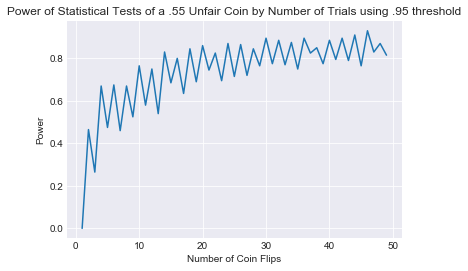

In [4]:
#What does the power increase as we increase sample size?
powers = []
cutoff = .95 #Set the p-value threshold for rejecting the null hypothesis
#Iterate through various sample sizes
unfair_coin_prob = .55
for n in range(1,50):
    #Do multiple runs for that number of samples to compare
    p_val = []
    for i in range(200):
        n_heads = np.random.binomial(n, unfair_coin_prob)
        mu = n / 2
        sigma = np.sqrt(n*.5*(1-.5))
        z  = (n_heads - mu) / (sigma / np.sqrt(n))
        p_val.append(st.norm.cdf(np.abs(z)))
    cur_power = sum([1 if p >= cutoff else 0 for p in p_val])/200
    powers.append(cur_power)
plt.plot(list(range(1,50)), powers)
plt.title('Power of Statistical Tests of a .55 Unfair Coin by Number of Trials using .95 threshold')
plt.ylabel('Power')
plt.xlabel('Number of Coin Flips')

In [30]:
n = 100
binomial = np.random.binomial(n, unfair_coin_prob)
binomial

70

## Summary

In this lesson, we discussed the idea of "statistical power" and how sample size, p_value and effect size impact the power of an experiment. Remember, the power of a statistical test is the probability of rejecting the null hypothesis when it is indeed false.